In [22]:
import pandas as pd
import numpy as np

## Load Dataset

In [23]:
df = pd.read_csv('DATASET.csv')
df.sample()

,sett_70,sett_75,sett_80,sett_85,sett_90,sett_95,sett_100,Arms,Class
42,64.0,77.0,83.0,89.0,94.0,101.0,106.0,4.675162,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sett_70   47 non-null     float64
 1   sett_75   47 non-null     float64
 2   sett_80   47 non-null     float64
 3   sett_85   47 non-null     float64
 4   sett_90   47 non-null     float64
 5   sett_95   47 non-null     float64
 6   sett_100  47 non-null     float64
 7   Arms      47 non-null     float64
 8   Class     47 non-null     float64
dtypes: float64(9)
memory usage: 3.5 KB


In [25]:
numerical = []
catgols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else :
        catgols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/t5/cdc5yd955yl2vl445bb5sc200000gn/T/ipykernel_7990/3243896838.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/t5/cdc5yd955yl2vl445bb5sc200000gn/T/ipykernel_7990/3243896838.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [26]:
numerical

['sett_70',
 'sett_75',
 'sett_80',
 'sett_85',
 'sett_90',
 'sett_95',
 'sett_100',
 'Arms',
 'Class']

In [27]:
catgols

[]

In [28]:
df['Class'].value_counts()

Class
1.0    36
0.0    12
Name: count, dtype: int64

In [29]:
ind_col = [col for col in df.columns if col != 'Class']
dep_col = 'Class'

In [30]:
df[dep_col].value_counts()

Class
1.0    36
0.0    12
Name: count, dtype: int64

## Transformasi Dataset
untuk membuat data menjadi numerical semuanya

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgols:
    df[col] = le.fit_transform(df[col])

In [32]:
df['Class'] = le.fit_transform(df['Class'])

In [33]:
x = df[ind_col] #feature
y = df[dep_col] #label/target

In [34]:
df.head()

,sett_70,sett_75,sett_80,sett_85,sett_90,sett_95,sett_100,Arms,Class
0,70.0,75.0,80.0,85.0,90.0,95.0,100.0,0.000000,1
1,69.0,74.0,79.0,84.0,89.0,94.0,99.0,1.000000,1
2,71.0,75.0,80.0,85.0,90.0,95.0,100.0,0.377964,1
3,70.0,76.0,80.0,86.0,91.0,96.0,100.0,0.755929,1
4,70.0,75.0,81.0,85.0,90.0,95.0,101.0,0.534522,1


In [35]:
df.to_csv('pulseoksimeter.csv')

In [36]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## SVM Model

In [37]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

## Evaluasi Model

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


In [39]:

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 0.8333333333333334


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_acc = accuracy_score(y_test, clf.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, clf.predict(x_train))}")
print(f"akurasi data testing = {svm_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, clf.predict(x_test))} \n")
confution = confusion_matrix(y_test, clf.predict(x_test))
tn, fp, fn, tp = confution.ravel()
print(f"nilai klasifisi report ; \n {classification_report(y_test, clf.predict(x_test))}")

akurasi data training = 1.0
akurasi data testing = 0.9 

confusion matrix : 
[[4 0]
 [1 5]] 

nilai klasifisi report ; 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



## simulasi model

In [32]:
input_data = (75, 77, 85, 90, 95, 97, 100, 3)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print('Tidak Akurat')
else:
    print('Akurat')

[1]
Akurat


/Users/mac/.local/share/virtualenvs/Ml-Lsga6RYH/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


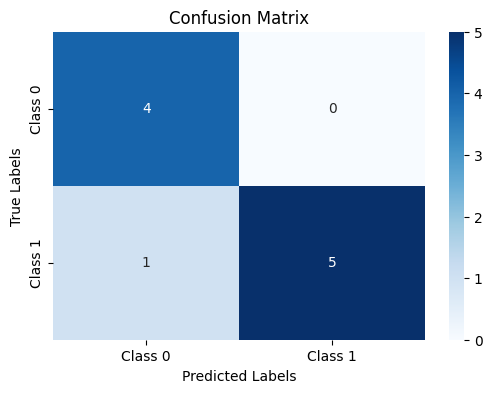

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Data confusion matrix
conf_matrix = [[4, 0],
               [1, 5]]

# Membuat plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Menambahkan label dan title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Menampilkan plot
plt.show()
